In [1]:
from loader import Dataset
import matplotlib.pyplot as plt

In [2]:
fd = Dataset()

In [3]:
fd.full_faces_path[0]

'/home/marci/GIT/FacialInpainting/src/../dat/Faces/ffhq-dataset/images1024x1024/28000/28534.png'

In [4]:
len(fd)

70000

0 (512, 512, 3)
1 (512, 512, 3)
2 (512, 512, 3)
3 (512, 512, 3)


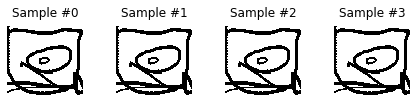

In [5]:
fig = plt.figure()

for i in range(len(fd)):
    sample = fd[i]

    print(i, sample['masked_image'].shape)

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    ax.imshow(sample["mask"])
    if i == 3:
        plt.show()
        break


In [6]:
import cv2
import os

tensor(0.8357, device='cuda:0', grad_fn=<L1LossBackward>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


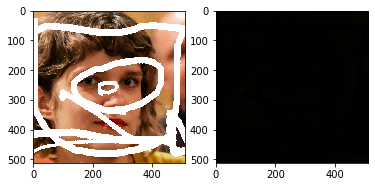

In [15]:
"""
Train the model
"""

from torch.utils import data
from torch.utils.data.sampler import SubsetRandomSampler
import torch
import loss
import matplotlib.pyplot as plt
from model import DeFINe
from loader import Dataset


use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")

NET = DeFINe(device=device)
NET.to(device)


params = {'batch_size': 4,
          'shuffle': False,
          'num_workers': 4}

max_epochs = 1

training_set = Dataset()
training_generator = data.DataLoader(training_set, **params, sampler=SubsetRandomSampler([0]))

validation_set = Dataset(mask_path='../dat/qd_imd/test/')
validation_generator = data.DataLoader(validation_set, **params)


opt = torch.optim.Adam(NET.parameters(), lr=1e-4)
NET.train()

for epoch in range(max_epochs):
    for batch in training_generator:
        opt.zero_grad()
        masked_img = batch["masked_image"]
        mask = batch["mask"]
        pred, mask_ = NET(masked_img, mask)
        actual_loss = loss.l1_loss(pred, batch["image"], device)
        print(actual_loss)
        actual_loss.backward()
        opt.step()
        torch.cuda.empty_cache()

pred, mask_ = NET(batch["masked_image"], batch["mask"])

fig, axis = plt.subplots(1, 2)
axis[0].imshow(batch["masked_image"][0].reshape(512, 512, 3))
pred = pred.int().cpu().detach().numpy()
pred = pred.transpose(0, 2, 3, 1)
axis[1].imshow(pred[0])
plt.show()

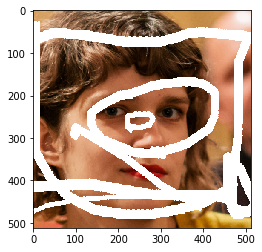

In [16]:
plt.imshow(masked_img[0])

In [17]:
mask.shape

torch.Size([1, 512, 512, 3])

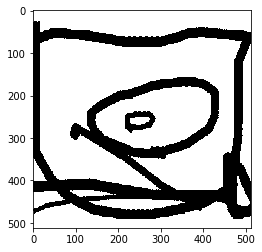

In [18]:
plt.imshow(mask[0])

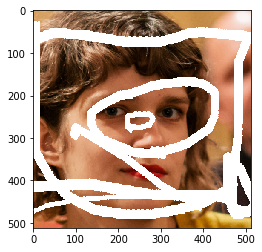

In [11]:
plt.imshow(mask.detach().cpu()[0].reshape(512, 512, 3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


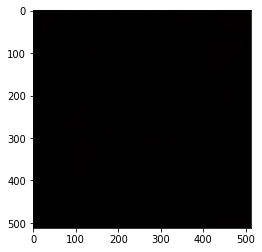

In [12]:
plt.imshow(pred[0])

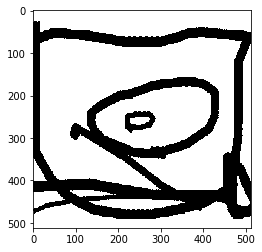

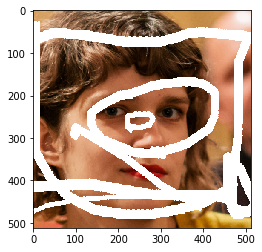

In [13]:
for batch in training_generator:
    img = batch["image"]
    mask = batch["mask"]
    masked = batch["masked_image"]
    plt.figure()
    plt.imshow(mask[0])
    plt.figure()
    plt.imshow(masked[0])
    break

In [14]:

opt = torch.optim.Adam(NET.parameters(), lr=1e-4)
NET.train()

for epoch in range(max_epochs):
    opt.zero_grad()
    pred, mask_ = NET(masked_image, mask )
    actual_loss = loss.l1_loss(pred, image)
    print(actual_loss)
    actual_loss.backward()
    opt.step()
    torch.cuda.empty_cache()



NameError: name 'masked_image' is not defined

In [ ]:
pred, mask = NET(masked_image, mask)

fig, axis = plt.subplots(1, 2)
axis[0].imshow(masked_image.reshape(1024, 1024, 3))
pred = pred.cpu().detach().numpy()
pred = pred.transpose(0, 2, 3, 1)
axis[0].imshow(pred[0])
plt.show()